<a href="https://colab.research.google.com/github/alexoliveros92/ANN/blob/main/Binary_Classification_Indian_Liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [3]:
col_names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv',names=col_names)
data
data = data.drop(data.index[[0]])
data.head(9)
#data.info()

preg plas pres skin test mass pedi   age class
65 0   0.7  0.1  187   16   18  6.8  3.3   0.9     1
62 1  10.9  5.5  699   64  100  7.5  3.2  0.74     1
   1   7.3  4.1  490   60   68    7  3.3  0.89     1
58 1     1  0.4  182   14   20  6.8  3.4     1     1
72 1   3.9    2  195   27   59  7.3  2.4   0.4     1
46 1   1.8  0.7  208   19   14  7.6  4.4   1.3     1
26 0   0.9  0.2  154   16   12    7  3.5     1     1
29 0   0.9  0.3  202   14   11  6.7  3.6   1.1     1
17 1   0.9  0.3  202   22   19  7.4  4.1   1.2     2

In [4]:
convert_dict = {'preg': float,
                'plas': float,
                'pres':float,                
                'skin':float,
                'test':float,
                'mass':float,
                'pedi':float,
                'age':float,
                'class':float
               }
data = data.astype(convert_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 583 entries, ('65', '0') to ('38', '1')
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    583 non-null    float64
 1   plas    583 non-null    float64
 2   pres    583 non-null    float64
 3   skin    583 non-null    float64
 4   test    583 non-null    float64
 5   mass    583 non-null    float64
 6   pedi    583 non-null    float64
 7   age     583 non-null    float64
 8   class   583 non-null    float64
dtypes: float64(9)
memory usage: 44.9+ KB


In [5]:
import numpy as np
data.test.replace(0,np.nan, inplace=True)
data.mass.replace(0,np.nan, inplace=True)
data.pedi.replace(0,np.nan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 583 entries, ('65', '0') to ('38', '1')
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    583 non-null    float64
 1   plas    583 non-null    float64
 2   pres    583 non-null    float64
 3   skin    583 non-null    float64
 4   test    583 non-null    float64
 5   mass    583 non-null    float64
 6   pedi    583 non-null    float64
 7   age     583 non-null    float64
 8   class   583 non-null    float64
dtypes: float64(9)
memory usage: 44.9+ KB


In [7]:
from sklearn.impute import SimpleImputer as imp

imput = imp(missing_values=np.nan, strategy='mean')
imput.fit(data)
X1 = imput.transform(data)
#np.set_printoptions(precision=3)
X1[0:5,:]

array([[7.00e-01, 1.00e-01, 1.87e+02, 1.60e+01, 1.80e+01, 6.80e+00,
        3.30e+00, 9.00e-01, 1.00e+00],
       [1.09e+01, 5.50e+00, 6.99e+02, 6.40e+01, 1.00e+02, 7.50e+00,
        3.20e+00, 7.40e-01, 1.00e+00],
       [7.30e+00, 4.10e+00, 4.90e+02, 6.00e+01, 6.80e+01, 7.00e+00,
        3.30e+00, 8.90e-01, 1.00e+00],
       [1.00e+00, 4.00e-01, 1.82e+02, 1.40e+01, 2.00e+01, 6.80e+00,
        3.40e+00, 1.00e+00, 1.00e+00],
       [3.90e+00, 2.00e+00, 1.95e+02, 2.70e+01, 5.90e+01, 7.30e+00,
        2.40e+00, 4.00e-01, 1.00e+00]])

In [8]:
df = pd.DataFrame(data=X1, columns=['preg','plas','pres','skin','test','mass','pedi','age','class'])
X= df.drop('class', axis=1)
#print(X)
Y=df['class']
Y=Y.values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 101)

#Logistic regression


In [13]:
model = LogisticRegression(random_state = 42, max_iter = 10000)
model.fit(X_train,y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7008547008547008

In [14]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[76  8]
 [27  6]]
              precision    recall  f1-score   support

         1.0       0.74      0.90      0.81        84
         2.0       0.43      0.18      0.26        33

    accuracy                           0.70       117
   macro avg       0.58      0.54      0.53       117
weighted avg       0.65      0.70      0.66       117



#GaussianNB classifier

In [15]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5213675213675214

In [16]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[30 54]
 [ 2 31]]
              precision    recall  f1-score   support

         1.0       0.94      0.36      0.52        84
         2.0       0.36      0.94      0.53        33

    accuracy                           0.52       117
   macro avg       0.65      0.65      0.52       117
weighted avg       0.78      0.52      0.52       117



#Support vector classifier

In [17]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7435897435897436

In [18]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[83  1]
 [29  4]]
              precision    recall  f1-score   support

         1.0       0.74      0.99      0.85        84
         2.0       0.80      0.12      0.21        33

    accuracy                           0.74       117
   macro avg       0.77      0.55      0.53       117
weighted avg       0.76      0.74      0.67       117



#Tree decision classifier

In [19]:
clfd = DecisionTreeClassifier(random_state=0)
clfd.fit(X_train, y_train)
clfd.score(X_test, y_test)

0.6581196581196581

In [20]:
y_pred = clfd.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[67 17]
 [23 10]]
              precision    recall  f1-score   support

         1.0       0.74      0.80      0.77        84
         2.0       0.37      0.30      0.33        33

    accuracy                           0.66       117
   macro avg       0.56      0.55      0.55       117
weighted avg       0.64      0.66      0.65       117



#Random forest classifier

In [21]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

<ipython-input-21-6e735ae22e0c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


0.6923076923076923

In [22]:
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[72 12]
 [24  9]]
              precision    recall  f1-score   support

         1.0       0.75      0.86      0.80        84
         2.0       0.43      0.27      0.33        33

    accuracy                           0.69       117
   macro avg       0.59      0.56      0.57       117
weighted avg       0.66      0.69      0.67       117



#ANN - Artificial Neural Networks

In [23]:
from sklearn.preprocessing import MinMaxScaler #normalising the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(X)
xscale=scaler_x.transform(X)
scaler_y.fit(Y)
yscale=scaler_y.transform(Y)
yscale
xscale

array([[0.00402145, 0.        , 0.06057645, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.14075067, 0.2755102 , 0.31069858, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.0924933 , 0.20408163, 0.20859795, ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.00536193, 0.00510204, 0.0889106 , ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.01206434, 0.02040816, 0.05911089, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.0080429 , 0.01020408, 0.07474353, ..., 0.66666667, 0.76086957,
        0.48      ]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2,random_state=3)

X_test.shape
X_train.shape

(466, 8)

In [25]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/150
38/38 [==============================] - 1s 8ms/step - loss: 0.6946 - accuracy: 0.5108 - val_loss: 0.6671 - val_accuracy: 0.6596
Epoch 2/150
38/38 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.7070 - val_loss: 0.6338 - val_accuracy: 0.7128
Epoch 3/150
38/38 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7124 - val_loss: 0.6142 - val_accuracy: 0.7128
Epoch 4/150
38/38 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.7124 - val_loss: 0.6007 - val_accuracy: 0.7128
Epoch 5/150
38/38 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.7124 - val_loss: 0.5916 - val_accuracy: 0.7128
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.7124 - val_loss: 0.5823 - val_accuracy: 0.7128
Epoch 7/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7124 - val_loss: 0.5759 - val_accuracy: 0.7128
Epoch 8/150
3

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [29]:
evalu =model.evaluate(X_train,y_train)
print(model.metrics_names[1], evalu[1]*100)

15/15 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7210
accuracy 72.1030056476593


In [30]:
evalu =model.evaluate(X_test,y_test)
print(model.metrics_names[1], evalu[1]*100)

4/4 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7521
accuracy 75.2136766910553


In [31]:
from sklearn.metrics import accuracy_score
yhat= model.predict(X_test)

yhat
y_test

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [32]:
ypred=[]
for i in yhat:
    if i > 0.5:
        ypred.append(1.0)
    else:
        ypred.append(0.0)
ypred

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0]

In [33]:
acc_=accuracy_score(y_test,ypred)
acc_

0.7521367521367521

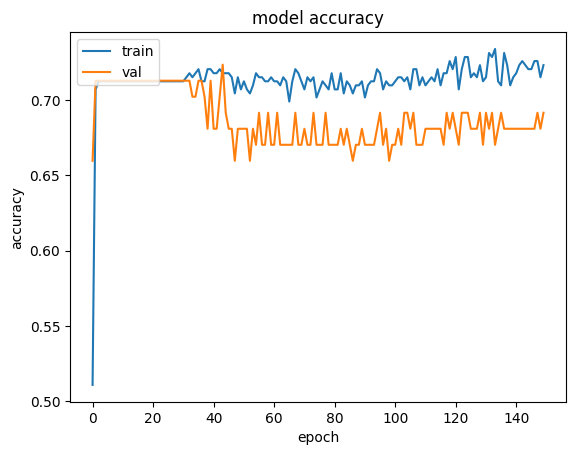

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

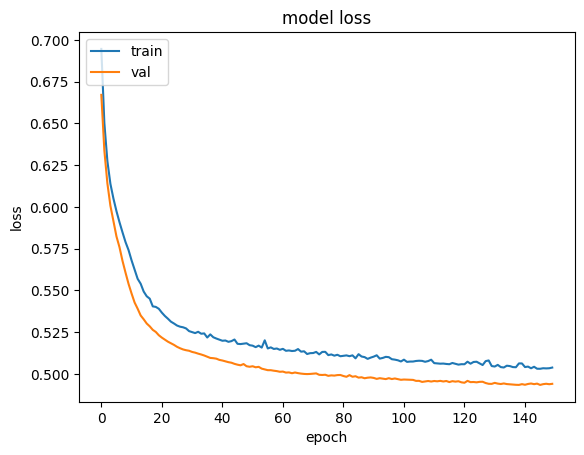

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()